In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation, rc
from numpy.random import random_sample
rc('animation', html='jshtml')

In [19]:
N = 30

In [39]:
m_truth = 25
b_truth = 80

In [40]:
def mk_line(m, b, x):
    return m * x + b

In [41]:
x = 10 * random_sample(N)

In [42]:
y = (10 * random_sample(N)) + mk_line(m_truth, b_truth, x)

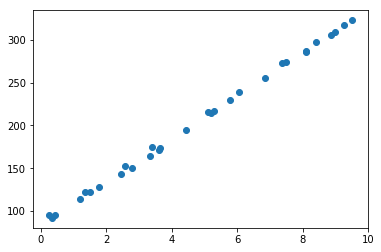

In [44]:
fig = plt.figure()
plt.scatter(x, y)

**goal**: find 'm' and 'b' (the weight and the bias)

TODO
- define how we will measure error
- define a loss function
- define an update function
- run the update function for N steps

In [45]:
def sse(y, y_predicted):
    return np.sum((y - y_predicted)**2)

In [46]:
def loss(y, m, b, x):
    return sse(y, mk_line(m, b, x))

In [47]:
def avg_loss(y, m, b, x):
    return np.mean(loss(y, m, b, x))

In [48]:
def update(y, x, lr=0.01):
    """given 'y' is the ground truth, 'x' is the input samples, updates parameters 'm_guess' and 'b_guess'
    such that they better fit a line between the points in x"""
    global m_guess, b_guess

    dm = 2 * x * (b_guess + (m_guess * x) - y)
    db = 2 * (b_guess + (m_guess * x) - y)
    
    m_guess -= lr * dm.mean()
    b_guess -= lr * db.mean()
        
    return avg_loss(y, m_guess, b_guess, x)

In [56]:
m_guess = 1.0
b_guess = 1.0

In [57]:
for i in range(1000):
    current_loss = update(y_truth, x)
    if i % 100 == 0:
        print("step=%d, loss = %.3f" % (i, current_loss))
print('LEARNED:\nm=%.3f, b=%.3f' % (m_guess, b_guess))

step=0, loss = 200056.041
step=100, loss = 15055.421
step=200, loss = 5169.540
step=300, loss = 1775.051
step=400, loss = 609.494
step=500, loss = 209.280
step=600, loss = 71.860
step=700, loss = 24.674
step=800, loss = 8.472
step=900, loss = 2.909
LEARNED:
m=25.054, b=79.649


In [55]:
fig = plt.figure(dpi=100, figsize=(5,4))
plt.scatter(x,y)
line, = plt.plot([], [])
plt.close()

def animate(i):
    line.set_data(x, mk_line(m_guess, b_guess, x))
    for i in range(10):
        update(y, x)
    return line,

anim = animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=100)
anim